In [238]:
import pandas as pd
import numpy as np

In [239]:
df = pd.read_csv("C:/Machine Learning/Evento.csv")

In [240]:
df = df.drop(df.columns[df.columns.str.contains('unnamed',case = False)],axis = 1)


In [241]:
req_df = pd.DataFrame(columns = ['Querys','Intent'])

In [242]:
querys = {}
for ele in df.columns:
    for sentence in df[ele]:
        if type(sentence) != float and int:
            querys[sentence] = ele

In [243]:
querys = {str.strip(k):v for k, v in querys.items()}

In [244]:
for key, value in querys.items():
    new = new.append(pd.DataFrame([[key,value]],columns = ['Querys','Intent']))

In [245]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB




In [246]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [247]:
X = new['Querys']
Y = new['Intent']

In [248]:
count_vect = CountVectorizer()
X_train_counts = count_vect.fit_transform(X)
tfidf_transformer = TfidfTransformer()
X_final = tfidf_transformer.fit_transform(X_train_counts)

In [249]:
lb = LabelEncoder()
Y_final = lb.fit_transform(Y)


In [250]:
#Y = Y.reshape(Y.shape[0],-1)

In [251]:
#ohc = OneHotEncoder(categorical_features=[0])
#Y_final = ohc.fit_transform(Y).toarray()

In [252]:
X_train, X_test, y_train, y_test = train_test_split(X_final, Y_final ,test_size = 0.25, random_state = 0)

In [253]:
type(X_train)

scipy.sparse.csr.csr_matrix

In [254]:
clf_n = MultinomialNB().fit(X_train, y_train)

In [255]:
y_pred = clf_n.predict(X_test)

In [256]:
from sklearn.metrics import accuracy_score

In [257]:
acc = accuracy_score(y_test,y_pred)

In [258]:
print(acc)

0.9707602339181286


In [259]:
from sklearn.cross_validation import cross_val_score

C:\Users\james\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [260]:
mlb = MultinomialNB()

In [272]:
scores = cross_val_score(mlb,X_final,Y_final,cv=5,scoring='accuracy')

In [273]:
print(scores.mean())

0.9795266980434916


In [274]:
print(scores)

[0.97841727 0.98550725 0.97080292 0.98529412 0.97761194]


In [280]:
from sklearn.metrics import confusion_matrix, classification_report

In [277]:
cnf = confusion_matrix(y_test, y_pred)

In [278]:
print(cnf)

[[23  0  0  0  0  0  0  2]
 [ 3 16  0  0  0  0  0  0]
 [ 0  0 13  0  0  0  0  0]
 [ 0  0  0 24  0  0  0  0]
 [ 0  0  0  0 19  0  0  0]
 [ 0  0  0  0  0 26  0  0]
 [ 0  0  0  0  0  0 30  0]
 [ 0  0  0  0  0  0  0 15]]


In [281]:
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.88      0.92      0.90        25
          1       1.00      0.84      0.91        19
          2       1.00      1.00      1.00        13
          3       1.00      1.00      1.00        24
          4       1.00      1.00      1.00        19
          5       1.00      1.00      1.00        26
          6       1.00      1.00      1.00        30
          7       0.88      1.00      0.94        15

avg / total       0.97      0.97      0.97       171



In [295]:
#plotting "k-value" in the K-fold validation against the validated scores
y = []
for c in range(2,15):
    scores = cross_val_score(mlb,X_final,Y_final,cv=c,scoring='accuracy')
    y.append(scores.mean())

In [296]:
x = list(range(2,15))

In [297]:
from matplotlib import pyplot as plt

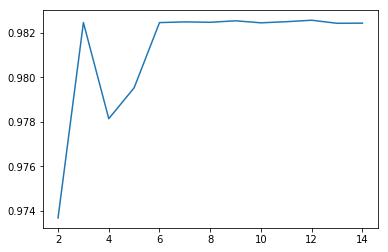

In [298]:
plt.plot(x,y)

In [294]:
import pickle

In [299]:
pickle_out = open("IntentClassifier.pickle","wb")

In [300]:
pickle.dump(clf_n,pickle_out)

In [301]:
pickle_out.close()